# TITANIC SURVIVAL **PREDICTION**

# 1.Data Preprocessing

In [50]:
import pandas as pd

In [51]:
import numpy as np

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [54]:
#Load dataset
data=pd.read_csv('/tested.csv')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [56]:
missing_values=data.isnull().sum()

In [57]:
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [58]:
#Fill missing values
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)
data['Fare'].fillna(data['Fare'].median(),inplace=True)



<ipython-input-58-d6991c3b6dcd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
<ipython-input-58-d6991c3b6dcd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [59]:
#Feature engineering
data['FamilySize']=data['SibSp']+data['Parch']
data['IsAlone']=(data['FamilySize']==0).astype(int)
data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [60]:
#Drop irrelevant features
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [61]:
#Encode categorical features
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [62]:
#Split data into features and target
X=data.drop('Survived',axis=1)
y=data['Survived']

In [63]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [64]:
import pickle
import joblib

In [65]:
#Standardize numerical features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [66]:
joblib.dump(scaler,'preprocess.pkl')

['preprocess.pkl']

# Visualization

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


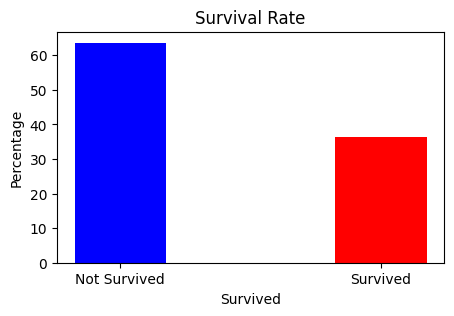

In [68]:
survival_rate = data['Survived'].value_counts(normalize=True) * 100
survival_data = pd.DataFrame({'Survived': survival_rate.index, 'Percentage': survival_rate.values})
colors=['blue','red']
plt.figure(figsize=(5, 3))
plt.bar(survival_data['Survived'], survival_data['Percentage'],color=colors, width=0.35)
plt.xticks(survival_data['Survived'], ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.title('Survival Rate')
plt.show()

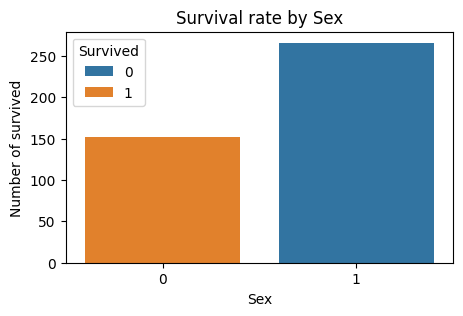

In [69]:
plt.figure(figsize=(5,3))
survival_by_sex=data[['Survived','Sex']].value_counts().reset_index()
sns.barplot(data=survival_by_sex,x='Sex',y='count',hue='Survived')
plt.ylabel('Number of survived')
plt.title('Survival rate by Sex')
plt.show()

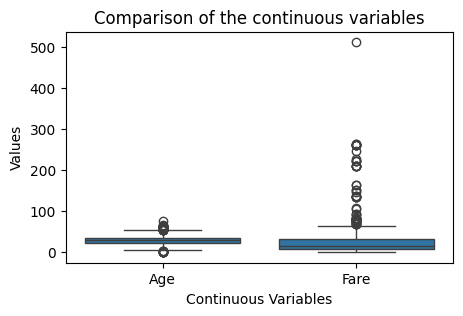

In [70]:
cont_vars = pd.melt(data, value_vars=['Age', 'Fare'])
plt.figure(figsize=(5, 3))
sns.boxplot(x='variable', y='value', data=cont_vars)
plt.xlabel('Continuous Variables')
plt.ylabel('Values')
plt.title('Comparison of the continuous variables')
plt.show()

# Model Training

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [72]:
#Initialize model
model=RandomForestClassifier(random_state=42)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)

In [73]:
#prediction
y_pred=model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [74]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[53  0]
 [ 0 31]]


# Hyperparameter tuning using GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[3,5,10],
    'min_samples_split':[2,5]}

In [77]:
grid_search=GridSearchCV(RandomForestClassifier(max_depth=5,random_state=42),param_grid,cv=5)
grid_search.fit(X_train_scaled,y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]})

In [78]:
#Best model and parameters
print("Best Parameters:",grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [79]:
tuned_model = grid_search.best_estimator_ # Assign the best estimator to tuned_model
y_pred = tuned_model.predict(X_test_scaled) # Predict using the tuned model
print(f"Tuned Accuracy:{accuracy_score(y_test,y_pred)}")

Tuned Accuracy:1.0


In [80]:
import pickle
with open('tuned_model.pkl', 'wb') as file:
  pickle.dump(tuned_model, file)

In [81]:
import joblib
joblib.dump(tuned_model,'tuned_model.pkl')
print("Model saved")
loaded_model=joblib.load('tuned_model.pkl')
print("Model loaded")


Model saved
Model loaded


In [82]:
import pickle
with open('preprocess.pkl','rb')as file:
    preprocessor=pickle.load(file)

In [84]:
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessor saved as 'preprocessor.pkl'")
# To load the preprocessor
loaded_preprocessor = joblib.load('preprocessor.pkl')
print("Preprocessor loaded successfully")


Preprocessor saved as 'preprocessor.pkl'
Preprocessor loaded successfully
